In [1]:
from pymongo import MongoClient
import pickle
import pandas as pd
import pandas
from itertools import chain
import numpy as np

from bson import json_util, ObjectId
import json

import re
from datetime import datetime

import matplotlib.pyplot as plt
client = MongoClient()
client.list_database_names()

['admin', 'config', 'local', 'ted']

In [2]:
json_normalize = pd.json_normalize

In [3]:
db = client.ted
db.list_collection_names()

['ted_stats_new',
 'ted_stats',
 'ted_comments_new',
 'ted_transcript_new',
 'ted_comments_old',
 'ted_transcript_old']

In [4]:
cursor = db.ted_stats.find({}, {'_id':0, 'items':1})

In [5]:
df =  pd.DataFrame(list(cursor))

In [6]:
df.shape

(2730, 1)

In [7]:

df.head()

,items
0,"[{'kind': 'youtube#video', 'etag': 'BOql7yUtZm..."
1,"[{'kind': 'youtube#video', 'etag': 'bSL7oWKXZi..."
2,"[{'kind': 'youtube#video', 'etag': 'v7Gbkiw9nb..."
3,"[{'kind': 'youtube#video', 'etag': 'CFFdWNbIS7..."
4,"[{'kind': 'youtube#video', 'etag': 'gnb4-MBBzK..."


In [8]:
new_df = pd.concat([pd.DataFrame(json_normalize(x)) for x in df['items']])

In [9]:

new_df.columns

Index(['kind', 'etag', 'id', 'snippet.publishedAt', 'snippet.channelId',
       'snippet.title', 'snippet.description',
       'snippet.thumbnails.default.url', 'snippet.thumbnails.default.width',
       'snippet.thumbnails.default.height', 'snippet.thumbnails.medium.url',
       'snippet.thumbnails.medium.width', 'snippet.thumbnails.medium.height',
       'snippet.thumbnails.high.url', 'snippet.thumbnails.high.width',
       'snippet.thumbnails.high.height', 'snippet.thumbnails.standard.url',
       'snippet.thumbnails.standard.width',
       'snippet.thumbnails.standard.height', 'snippet.thumbnails.maxres.url',
       'snippet.thumbnails.maxres.width', 'snippet.thumbnails.maxres.height',
       'snippet.channelTitle', 'snippet.tags', 'snippet.categoryId',
       'snippet.liveBroadcastContent', 'snippet.localized.title',
       'snippet.localized.description', 'snippet.defaultAudioLanguage',
       'contentDetails.duration', 'contentDetails.dimension',
       'contentDetails.definitio

In [ ]:

new_df.shape

(2721, 42)

In [12]:
new_df_select = new_df[['id',
                        'snippet.tags',
                        'snippet.title',
                        'snippet.publishedAt',
                        'statistics.commentCount', 
                        
                        'statistics.likeCount',
                        'statistics.viewCount'
                       ]]


In [13]:

new_df_select.sample(5)

,id,snippet.tags,snippet.title,snippet.publishedAt,statistics.commentCount,statistics.likeCount,statistics.viewCount
0,P0uG8YF_NiM,"[Jackson, Browne, TEDTalks, TED, talks]","Jackson Browne: ""If I Could Be Anywhere""",2011-04-26T17:11:51Z,41,284,31914
0,Vyn_xLrtZaY,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...",Margaret Heffernan: Why it's time to forget th...,2015-06-16T15:37:20Z,242,7146,609614
0,xgYtUKFzHf8,"[TED Talk, TED Talks, Ameera Haroda, Gaza, fix...",Why I put myself in danger to tell the stories...,2016-05-20T16:12:21Z,775,2517,87692
0,sz77x05rySc,"[TED, TEDTalks, TEDGlobal, Ian Ritchie, Tim Be...",Ian Ritchie: The day I turned down Tim Berners...,2011-10-12T16:30:28Z,66,530,45970
0,4xKC0ldOn0E,"[TEDTalk, TEDTalks, live music, music, perform...","""The Last Serenade"" | Lili Haydn",2018-08-12T15:22:28Z,237,4599,144626


In [14]:
new_df_select['snippet.publishedAt'] = pd.to_datetime(new_df_select['snippet.publishedAt'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27476\3048775952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_select['snippet.publishedAt'] = pd.to_datetime(new_df_select['snippet.publishedAt'])


In [16]:
new_df_select['snippet.tags'].values[0]

['TEDTalk',
 'TEDTalks',
 'TED Talk',
 'TED Talks',
 'Family',
 'Parenting',
 'Communication',
 'Children',
 'Relationships',
 'TEDx']

In [17]:

#new_df_select['snippet.tags'].values[0].remove(['TEDTalk'])
mylist = ['TEDTalk', 'TEDTalks', 'TED Talk', 'TED Talks', 'TED', 'TEDx', 'TED Residency', 'TED en Español',
         'TEDSalon NY2015', 'TED Books', 'TED Fellows', 'TEDxToronto', 'TEDGlobal', 'TEDxPhoenix', 'TED2004', 'TED2015',
         'TED@NYC', 'TED (Organization)', 'TED Prize', 'TED Talks (video)', 'TEDxBend', 'TED Fellow', 
         '\TED', 'Talk\\', 'Talks\\', 'TED Institute', 'TED@BCG', 'TEDxIndianapolis', 'TEDxABQ', 'TED University', 
         'TEDGlobal 2012', 'TED Global', 'about TEDTalks', 'what is TED', 'what are TEDTalks', 'TEDGlobal2012',
         'TED Global 2012', 'TED@250', 'TEDMED']
for i in mylist:
    for v in range(new_df_select.shape[0]):
        if i in new_df_select['snippet.tags'].values[v]: 
            new_df_select['snippet.tags'].values[v].remove(i)
    
#new_df_select['snippet.tags'].values[0]

<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27476\2174585042.py:5: SyntaxWarning: invalid escape sequence '\T'
  '\TED', 'Talk\\', 'Talks\\', 'TED Institute', 'TED@BCG', 'TEDxIndianapolis', 'TEDxABQ', 'TED University',


In [19]:
new_df_select['snippet.tags'].values[0]

['Family', 'Parenting', 'Communication', 'Children', 'Relationships']

In [20]:
pd.DataFrame(new_df_select['snippet.tags'].tolist(), index= new_df_select.index).add_prefix('tag_')

,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,...,tag_39,tag_40,tag_41,tag_42,tag_43,tag_44,tag_45,tag_46,tag_47,tag_48
0,Family,Parenting,Communication,Children,Relationships,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
0,climate change,environment,global issues,choice,leadership,humanity,society,fear,None,None,...,None,None,None,None,None,None,None,None,None,None
0,Life,Society,Immigration,Humanity,Self,Personal Growth,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
0,global issues,science,collaboration,virus,big problems,pandemic,coronavirus,None,None,None,...,None,None,None,None,None,None,None,None,None,None
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Kevin,Bales,talks,slavery,human,trafficking,economy,industry,slave,business,...,None,None,None,None,None,None,None,None,None,None
0,Robert,Gupta,talks,Fellow,music,musician,violin,cello,Bach,LA,...,None,None,None,None,None,None,None,None,None,None
0,Joel,Levine,talks,TEDxNASA,NASA,Mars,space,exploration,water,planet,...,None,None,None,None,None,None,None,None,None,None
0,Alan,Siegel,talks,law,fine,print,legal,legalese,document,business,...,None,None,None,None,None,None,None,None,None,None


In [21]:

new_df_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2721 entries, 0 to 0
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   id                       2721 non-null   object             
 1   snippet.tags             2721 non-null   object             
 2   snippet.title            2721 non-null   object             
 3   snippet.publishedAt      2721 non-null   datetime64[ns, UTC]
 4   statistics.commentCount  2689 non-null   object             
 5   statistics.likeCount     2711 non-null   object             
 6   statistics.viewCount     2721 non-null   object             
dtypes: datetime64[ns, UTC](1), object(6)
memory usage: 170.1+ KB


In [22]:

new_df_select.columns

Index(['id', 'snippet.tags', 'snippet.title', 'snippet.publishedAt',
       'statistics.commentCount', 'statistics.likeCount',
       'statistics.viewCount'],
      dtype='object')

In [23]:
new_df_select.rename(columns={'id':'video_id', 'snippet.tags':'tags', 'snippet.title': 'title',
                             'statistics.commentCount':'comments_count', 'statistics.dislikeCount':'dislike_count',
                             'statistics.likeCount':'like_count', 'statistics.viewCount':'views_count',
                             'snippet.publishedAt':'publushed_date'}, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27476\743335426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_select.rename(columns={'id':'video_id', 'snippet.tags':'tags', 'snippet.title': 'title',


In [24]:

new_df_select.head(10)

,video_id,tags,title,publushed_date,comments_count,like_count,views_count
0,YgAuFqEs6yk,"[Family, Parenting, Communication, Children, R...",Ebony Roberts and Shaka Senghor: How to co-par...,2020-05-14 14:40:00+00:00,122,1368,56205
0,bNmRr-BYnxA,"[climate change, environment, global issues, c...",How to shift your mindset and choose your futu...,2020-05-13 14:22:51+00:00,240,4071,138978
0,FVUkKKc3Vvk,"[Life, Society, Immigration, Humanity, Self, P...",Elizabeth Camarillo Gutierrez: What's missing ...,2020-05-12 18:06:31+00:00,183,2314,114766
0,8bj0GR34XWc,"[global issues, science, collaboration, virus,...",A global pandemic calls for global solutions |...,2020-05-11 15:52:37+00:00,253,1581,66764
0,eaCrsBtiYA4,[],Racism has a cost for everyone | Heather C. Mc...,2020-05-08 18:44:35+00:00,591,6756,231491
0,OMDVTZ-ycaY,"[Humanity, Technology, Curiosity, Science, Exp...","How to spark your curiosity, scientifically | ...",2020-05-07 16:16:18+00:00,148,3840,136020
0,ppjXgm4t9ko,"[Molecular Biology, CRISPR, Biology, Animation...","The wonders of the molecular world, animated |...",2020-05-06 17:14:06+00:00,93,2824,82977
0,wGGmzeCT8gU,"[Planets, Space, Chemistry, Exploration, Disco...",The galactic recipe for a living planet | Kari...,2020-05-05 15:40:49+00:00,129,1604,60027
0,2g8BeujckJY,"[Relationships, Love, Empathy, Communication, ...",How understanding divorce can help your marria...,2020-05-04 15:48:43+00:00,429,6282,804907
0,bW941OpsnMM,"[Social Change, Activism, Human Rights, Commun...","In uncertain times, think like a mother | Yifa...",2020-05-01 21:40:32+00:00,151,2732,112258


In [25]:
new_df_select['today'] = pd.Timestamp.now()  # Includes current date and time


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27476\3777594088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_select['today'] = pd.Timestamp.now()  # Includes current date and time


In [28]:
new_df_select['publushed_date'] = new_df_select['publushed_date'].dt.tz_convert(None)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27476\2755687937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_select['publushed_date'] = new_df_select['publushed_date'].dt.tz_convert(None)


In [29]:
new_df_select['days_age'] = (new_df_select['today'] - new_df_select['publushed_date']).dt.days

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27476\3582916321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_select['days_age'] = (new_df_select['today'] - new_df_select['publushed_date']).dt.days


In [30]:
new_df_select['views_per_day'] = new_df_select['views_count'].astype(int)/new_df_select['days_age']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27476\2528974701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_select['views_per_day'] = new_df_select['views_count'].astype(int)/new_df_select['days_age']


In [31]:

new_df_select = new_df_select[new_df_select['like_count'].notna()]

In [34]:
new_df_select['success'] = np.where((new_df_select['like_count']).astype(int) > 10000, 'yes', 'no')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27476\4256307754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_select['success'] = np.where((new_df_select['like_count']).astype(int) > 10000, 'yes', 'no')


In [35]:

def get_first_tag(column = new_df_select['tags']):
    first_tags = []
    for i in range(column.shape[0]):
        if len(column.values[i]) > 0:
            first_tags.append(column.values[i][0])
        else:
            first_tags.append('no_tags')
    return first_tags

In [36]:

new_df_select['prime_tag'] = get_first_tag(column = new_df_select['tags'])

(array([2201.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         510.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

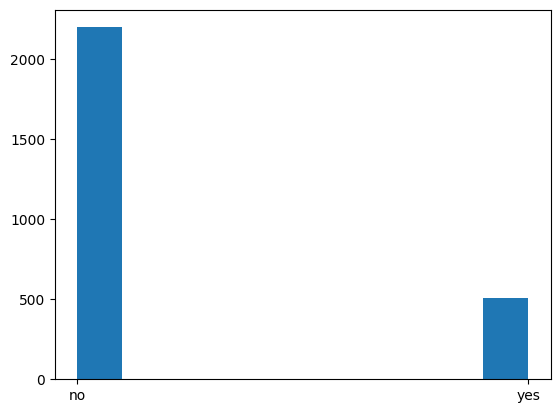

In [39]:

plt.hist(new_df_select['success'])

In [40]:

with open('ted_video_stats_old.pkl', 'wb') as picklefile:
    pickle.dump(new_df_select, picklefile)